<center><img src="./images/logo_fmkn.png" width=300 style="display: inline-block;"></center> 

## Машинное обучение
### Семинар 8. Метод опорных векторов

<br />
<br />
28 октября 2021

### Бинарная классификация

Создадим случайную линейно разделимую задачу классификации в двумерном пространстве.

In [81]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

np.random.seed(42)

w = normalize(np.random.uniform(-1.0, 1.0, (1, 2))).ravel()
X = np.random.uniform(-1.0, 1.0, (150, 2))
y = (X @ w > 0).astype(np.int32)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=50, 
                                                    random_state=0)    

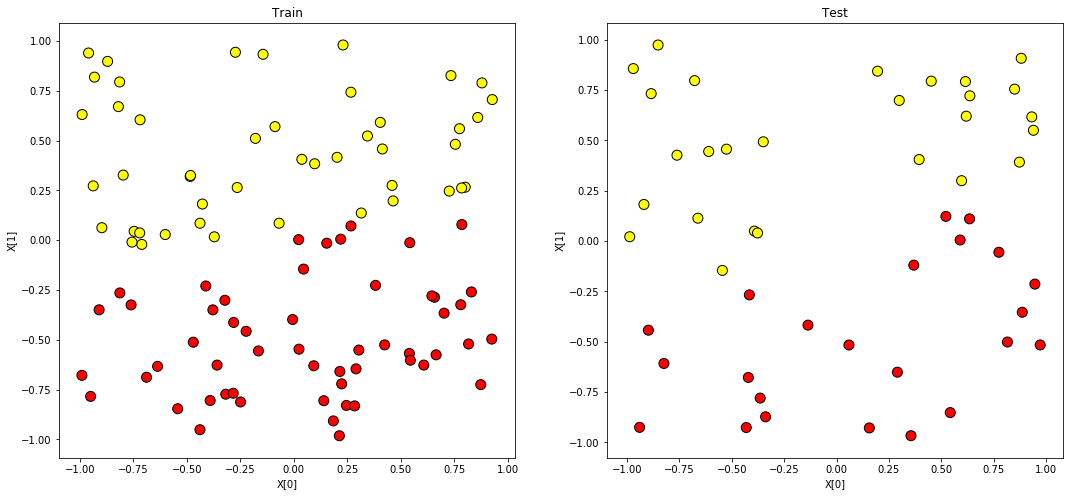

In [82]:
fig, gs = plt.figure(figsize=(18, 8)), GridSpec(1, 2)

for X, y, caption, i in ((X_train, y_train, "Train", 0), (X_test, y_test, "Test", 1)):
    splt = fig.add_subplot(gs[i])
    splt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn', edgecolors="black")
    splt.set_xlabel("X[0]")
    splt.set_ylabel("X[1]")
    splt.title.set_text(caption)

plt.show()

В `sklearn` есть несколько функций для работы с `SVM`, использующие разные алгоритмы решения. Сейчас мы хотим посмотреть на найденные опорные вектора, поэтому вспользуемся `svm.SVC`.

In [83]:
from sklearn import svm
clf = svm.SVC(kernel="linear") # for large datasets use svm.LinearSVC
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [84]:
from mlxtend.plotting import plot_decision_regions

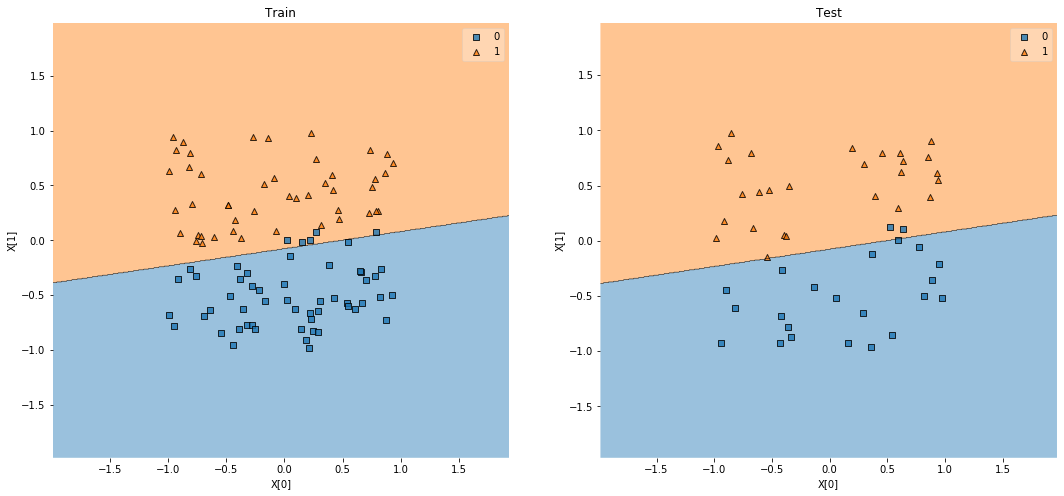

In [85]:
fig, gs = plt.figure(figsize=(18, 8)), GridSpec(1, 2)

for X, y, caption, i in ((X_train, y_train, "Train", 0), (X_test, y_test, "Test", 1)):
    splt = fig.add_subplot(gs[i])
    plot_decision_regions(X, y, clf, ax=splt)
    splt.set_xlabel("X[0]")
    splt.set_ylabel("X[1]")
    splt.title.set_text(caption)

plt.show()

In [86]:
def show_legend():
    cb = plt.colorbar()
    loc = [0, 1, 2, 3]
    cb.set_ticks(loc)
    cb.set_ticklabels(loc)

def support_show():
    plt.figure(figsize=(8, 8))
    y_support = np.zeros_like(y_train)
    y_support[clf.support_] = 2
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_support + y_bad, s=100, cmap='spring', edgecolors="black")
    plt.xlabel("X[0]")
    plt.ylabel("X[1]")
    plt.title("Support Vectors")
    
    show_legend()
    plt.show()

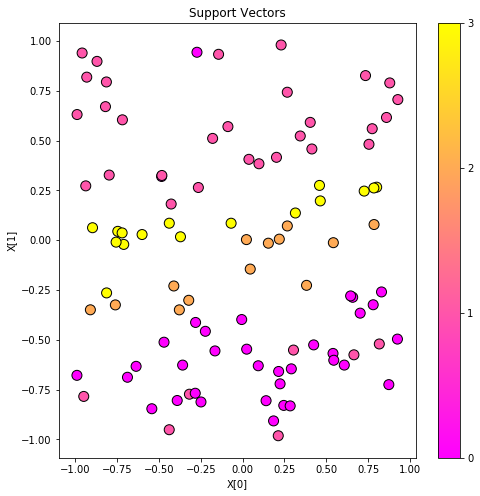

In [87]:
support_show()

In [88]:
clf.support_

array([ 3, 31, 37, 39, 40, 41, 57, 67, 76, 80, 82, 89, 92, 99,  7,  8, 21,
       26, 30, 32, 44, 46, 55, 59, 63, 72, 74, 87, 88])

In [89]:
# Number of support vectors for each class
clf.n_support_

array([14, 15])

Посмотрим, что произойдет, если мы добавим несколько ошибок классификации в тренировочный датасет.

In [90]:
y_bad = y_train.copy()
bad_indices = np.random.choice(range(len(y_bad)), 10)
y_bad[bad_indices] = 1 - y_bad[bad_indices]

In [91]:
clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_bad)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

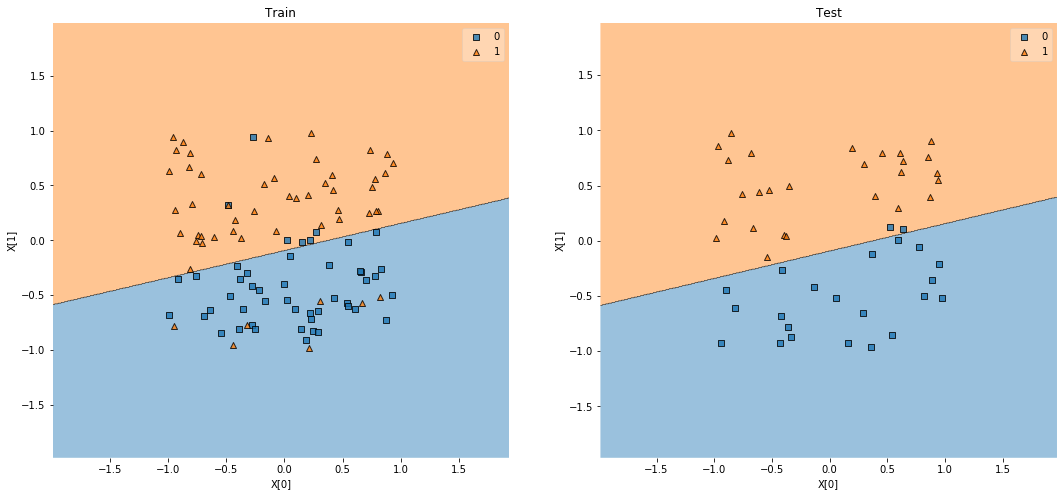

In [92]:
fig, gs = plt.figure(figsize=(18, 8)), GridSpec(1, 2)

for X, y, caption, i in ((X_train, y_bad, "Train", 0), (X_test, y_test, "Test", 1)):
    splt = fig.add_subplot(gs[i])
    plot_decision_regions(X, y, clf, ax=splt)
    splt.set_xlabel("X[0]")
    splt.set_ylabel("X[1]")
    splt.title.set_text(caption)

plt.show()

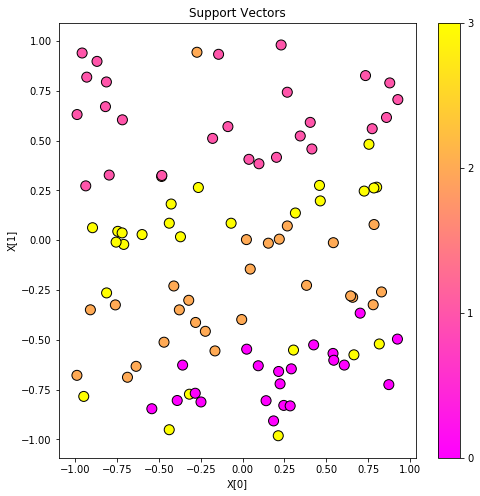

In [93]:
support_show()

In [94]:
clf.n_support_

array([27, 26])

В предыдущем примере мы использовали `soft margin`, посмотрим, что изменится, если мы перейдем к `hard margin`.

In [95]:
clf = svm.SVC(kernel="linear", C=1e9)
clf.fit(X_train, y_train)

SVC(C=1000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [96]:
clf.support_

array([ 3,  8, 30])

In [97]:
clf.n_support_

array([1, 2])

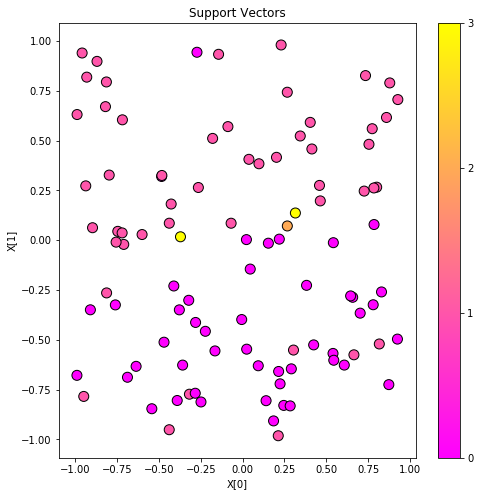

In [98]:
support_show()

<div class="alert alert-info">
<b>Вопрос 1:</b> Сколько опорных векторов отберется, если признаков будет 10? 100?
</div>

In [99]:
w = normalize(np.random.uniform( -1.0, 1.0, (1, 10))).ravel()
X = np.random.uniform(-1.0, 1.0, (150, 10))
y = (X @ w > 0).astype(np.int32)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=50, 
                                                    random_state=0)

In [100]:
clf = svm.SVC(kernel="linear", C=1e9)
clf.fit(X_train, y_train)

SVC(C=1000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [101]:
clf.support_

array([39, 51, 53, 68,  3,  6, 19, 28, 30, 33, 48])

In [102]:
clf.n_support_

array([4, 7])

In [103]:
w = normalize(np.random.uniform( -1.0, 1.0, (1, 100))).ravel()
X = np.random.uniform(-1.0, 1.0, (1500, 100))
y = (X @ w > 0).astype(np.int32)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=500, 
                                                    random_state=0)

In [104]:
clf = svm.SVC(kernel="linear", C=1e9)
clf.fit(X_train, y_train)

SVC(C=1000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [105]:
clf.support_

array([ 43,  45,  68,  71,  86, 124, 133, 137, 178, 181, 183, 205, 227,
       238, 283, 296, 332, 363, 394, 418, 424, 434, 447, 452, 478, 503,
       523, 555, 567, 570, 589, 623, 630, 637, 660, 666, 698, 721, 747,
       774, 796, 805, 823, 860, 868, 875, 884, 890, 891, 904, 962, 977,
       982,  81,  94, 108, 128, 144, 167, 191, 231, 253, 322, 344, 371,
       385, 386, 388, 419, 422, 425, 431, 438, 471, 476, 480, 489, 509,
       510, 542, 581, 602, 625, 643, 649, 651, 706, 708, 719, 724, 751,
       770, 856, 858, 880, 930, 950, 958, 997])

In [106]:
clf.n_support_

array([53, 46])

<div class="alert alert-info">
<b>Вопрос 2:</b> А если есть 3 реальных и 2 шумовых признака?
</div>

In [107]:
w = np.concatenate((normalize(np.random.uniform(-1.0, 1.0, (1, 3))).ravel(), np.zeros(2)))
X = np.random.uniform(-1.0, 1.0, (150, 5))
y = ((X @ w) > 0).astype(np.int32)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=50, 
                                                    random_state=0)

In [108]:
clf = svm.SVC(kernel="linear") #, C=0.01)
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [109]:
clf.n_support_

array([16, 15])

In [110]:
clf.coef_

array([[ 2.74862022,  1.5361658 ,  2.21442717, -0.2470039 , -0.21763402]])

Как видите с точки зрения отбора признаков все совсем плохо.

<div class="alert alert-info">
<b>Вопрос 3:</b> В чем причина?
</div>

In [111]:
clf = svm.LinearSVC(penalty="l2") #, C=0.01)
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [112]:
clf.coef_

array([[ 2.41836941,  1.27580155,  2.04688214, -0.0483113 , -0.03645484]])

In [113]:
clf = svm.LinearSVC(penalty="l1", dual=False, C=0.1)
clf.fit(X_train, y_train)

LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0)

In [114]:
clf.coef_

array([[1.07505823, 0.52681141, 0.80388278, 0.        , 0.        ]])

Однако, когда число шумовых фич растет, перестает справляться и LASSO, и нужно их отбирать (ещё можно уменьшать C):

In [115]:
w = np.concatenate((normalize(np.random.uniform( -1.0, 1.0, (1, 10))).ravel(), np.zeros(90)))
X = np.random.uniform(-1.0, 1.0, (1500, 100))
y = ((X @ w) > 0).astype(np.int32)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=500, 
                                                    random_state=0)

In [118]:
clf = svm.LinearSVC(penalty="l1", C=0.1, dual=False)
clf.fit(X_train, y_train)

LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0)

In [119]:
clf.coef_

array([[ 5.07808305e-01,  1.19974065e+00,  2.82292208e-01,
        -8.46876875e-01, -9.64006875e-01,  2.15057206e+00,
         1.59546135e+00, -1.06777841e+00,  1.39091307e+00,
        -9.01802609e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -8.02485477e-04,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -5.77314607e-03,  4.76918836e-02, -4.74993773e-02,
        -4.91900612e-02,  1.54562550e-02,  0.00000000e+00,
         3.03973781e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  3.60580265e-02,
        -6.84588530e-02,  0.00000000e+00,  0.00000000e+00,
         4.74646853e-02,  0.00000000e+00,  0.00000000e+00,
        -1.29882315e-02, -2.96521988e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.45841554e-02,  0.00000000e+00,
         7.69446012e-03,  0.00000000e+00,  0.00000000e+0

<div class="alert alert-info">
<b>Вопрос 4:</b> А зачем нужна l2 регуляризация?
</div>

In [120]:
def r2(w, nu):
    return (1 - nu)*np.abs(w) + nu*w*w

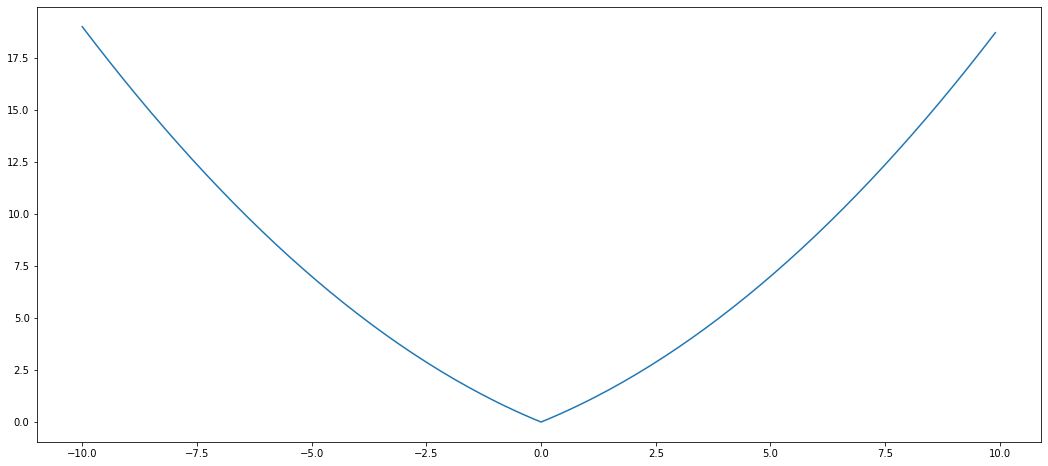

In [121]:
plt.figure(figsize=(18, 8))
x = np.arange(-10.0, 10.0, 0.1)
plt.plot(x, list(map(lambda v: r2(v, 0.1), x)))

In [122]:
def r(w, nu):
    if np.abs(w) < nu:
        return 2 * nu * np.abs(w)
    else:
        return nu * nu + w * w

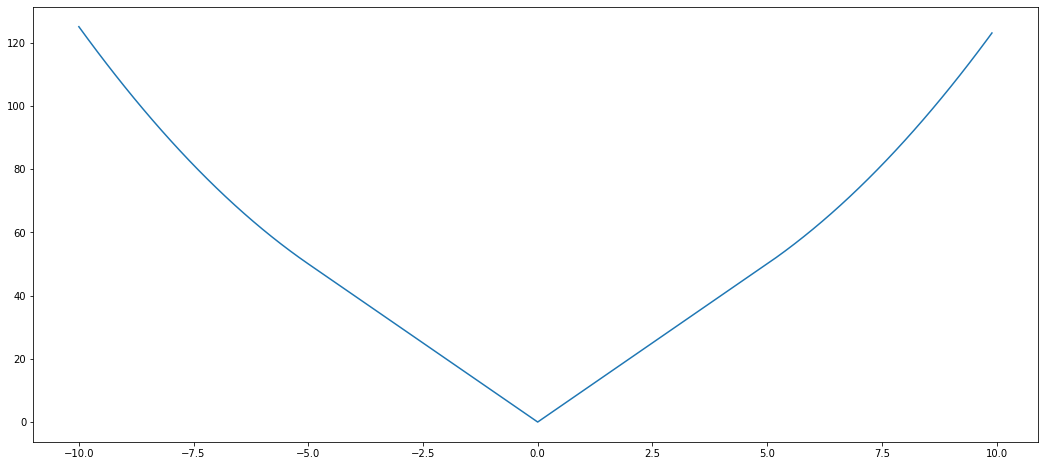

In [123]:
plt.figure(figsize=(18, 8))
x = np.arange(-10.0, 10.0, 0.1)
plt.plot(x, list(map(lambda v: r(v, 5), x)))

## Многоклассоваяя классификация

До боли знакомые ирисы.

In [124]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X = X[:, 0:2]
features = np.array(["длина чашелистика", "ширина чашелистика"])
labels = np.array(["щетинистый", "виргинский", "разноцветный"])

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=30, 
                                                    random_state=0)

In [126]:
def show_legend():
    cb = plt.colorbar()
    loc = [0, 1, 2]
    cb.set_ticks(loc)
    cb.set_ticklabels(labels)
    

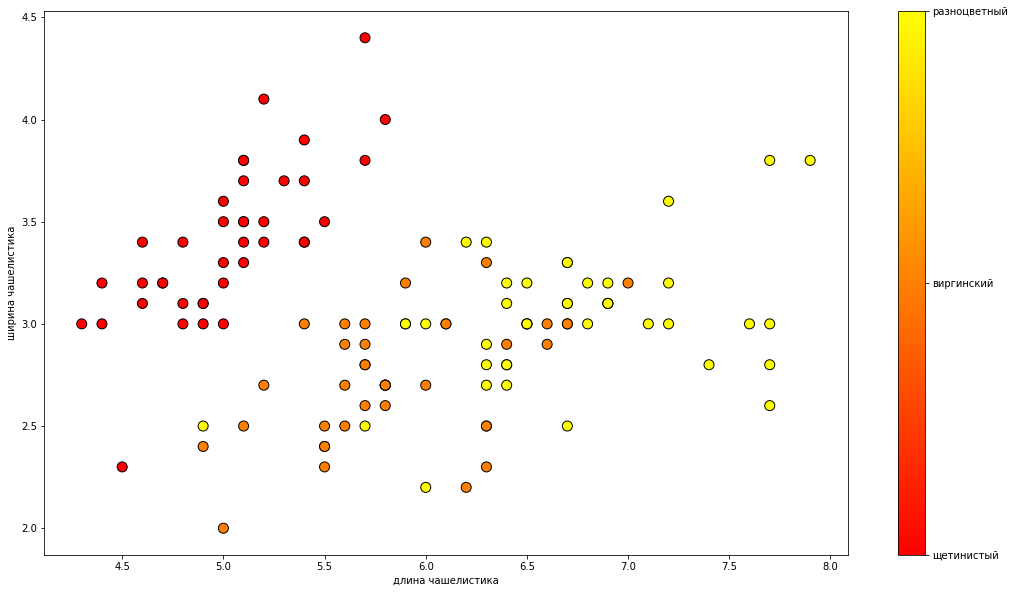

In [127]:
plt.figure(figsize=(18.0, 10.0))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, cmap='autumn', edgecolors="black")
plt.xlabel(features[0])
plt.ylabel(features[1])
show_legend()

В `sklearn` многоклассовая классификаци для `SVM` реализована по методу один-против одного.

In [128]:
from sklearn import svm
clf = svm.SVC(kernel="linear", decision_function_shape='ovo') 
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

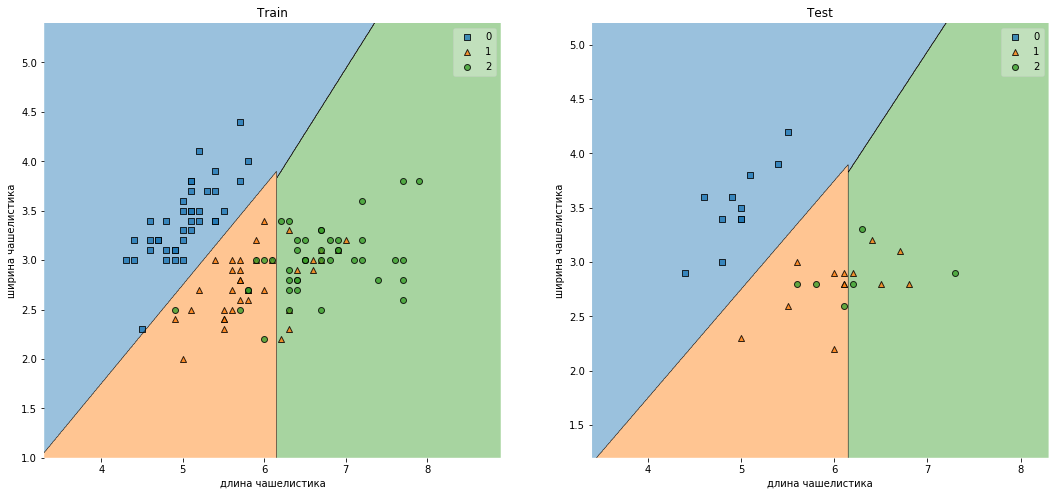

In [129]:
fig, gs = plt.figure(figsize=(18, 8)), GridSpec(1, 2)

for X, y, caption, i in ((X_train, y_train, "Train", 0), (X_test, y_test, "Test", 1)):
    splt = fig.add_subplot(gs[i])
    plot_decision_regions(X, y, clf, ax=splt)
    splt.set_xlabel(features[0])
    splt.set_ylabel(features[1])
    splt.title.set_text(caption)

plt.show()

Для каждого примера получаем 3*2/2 = 3 решающие функции. Первый элемент — решающая функция 0-1, второй: 0-2, третий: 1-2. 

In [130]:
clf.decision_function(X_test[0:5])

array([[-1.66805638, -0.90261282,  0.63678683],
       [-3.44853411, -2.26873121,  0.27301525],
       [ 2.11589205,  1.93943908,  1.1824453 ],
       [-4.77990648, -3.85405701, -2.09148971],
       [ 1.44621993,  1.70751319,  2.0918691 ]])

<div class="alert alert-info">
<b>Вопрос 5:</b> Предложите метод, как воспользоваться данной решающей функцией для классификации.
</div>

> An alternative is to introduce K(K − 1)/2 binary discriminant functions, one for every possible pair of classes. This is known as a one-versus-one classifier. Each point is then classified according to a **majority vote** amongst the discriminant functions.

— Page 183, C.M. Bishop, Pattern Recognition and Machine Learning, 2006

[Как реализовано в sklearn](https://github.com/scikit-learn/scikit-learn/blob/844b4be24d20fc42cc13b957374c718956a0db39/sklearn/utils/multiclass.py#L443)

<div class="alert alert-info">
<b>Вопрос 6:</b> Предложите способ выбора класса, если при голосовании получилось несколько классов с равным числом голосов.
</div>

По умолчанию, в случае, если методом голосования не удастся выбрать наиболее вероятный класс, выбирается класс с меньшим номером. Чтобы ничьи разрешались, нужно передать `break_ties=True`.

Если в качестве решающей функции указать ovr, то мы по-прежнему получим три решающие функции, но смысл их будет уже другой: это уверенности алгоритма в каждом из классов. Даже если указать `decision_function_shape='ovr'`, всё равно вычисления будут проходить, как один-против-одного, единиственное на что это влияет — вид решающей функции.

In [131]:
clf = svm.SVC(kernel="linear", decision_function_shape='ovr')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

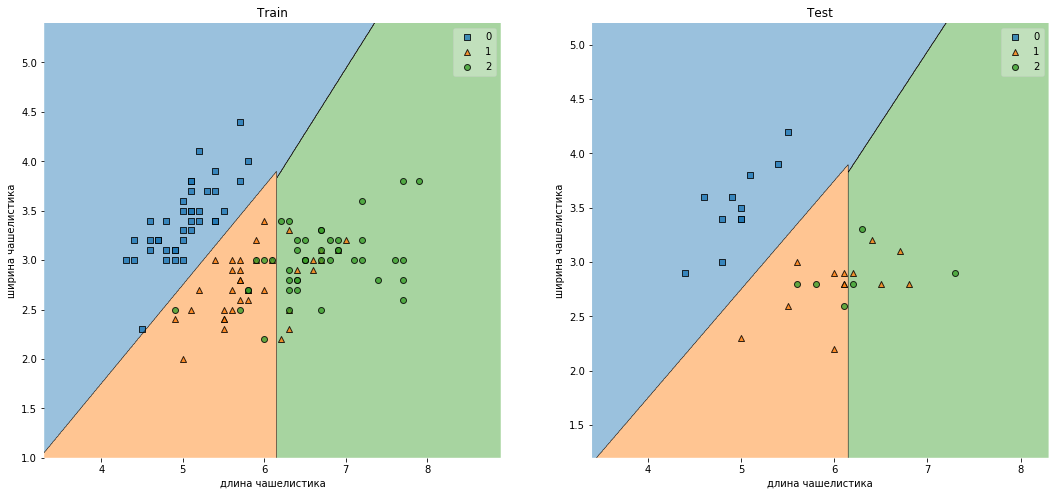

In [132]:
fig, gs = plt.figure(figsize=(18, 8)), GridSpec(1, 2)

for X, y, caption, i in ((X_train, y_train, "Train", 0), (X_test, y_test, "Test", 1)):
    splt = fig.add_subplot(gs[i])
    plot_decision_regions(X, y, clf, ax=splt)
    splt.set_xlabel(features[0])
    splt.set_ylabel(features[1])
    splt.title.set_text(caption)

plt.show()

In [133]:
clf.decision_function(X_test[0:5])

array([[-0.23998015,  2.23247126,  1.07000067],
       [-0.28370996,  2.26273504,  1.22206333],
       [ 2.26739634,  0.83907035, -0.25246417],
       [-0.29873352,  1.24296032,  2.28534095],
       [ 2.25308424,  1.13077902, -0.26387995]])

In [134]:
clf = svm.SVC(kernel="linear", decision_function_shape='ovr', break_ties=True)
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=True, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

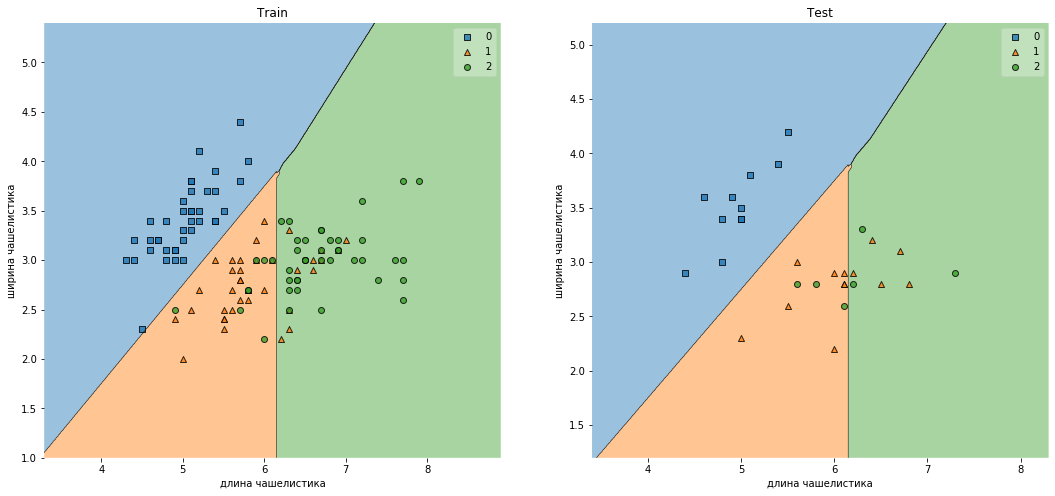

In [135]:
fig, gs = plt.figure(figsize=(18, 8)), GridSpec(1, 2)

for X, y, caption, i in ((X_train, y_train, "Train", 0), (X_test, y_test, "Test", 1)):
    splt = fig.add_subplot(gs[i])
    plot_decision_regions(X, y, clf, ax=splt)
    splt.set_xlabel(features[0])
    splt.set_ylabel(features[1])
    splt.title.set_text(caption)

plt.show()

Эту решающую функцию можно использовать для выбора наболее вероятного класса, но как вероятность её использовать невозможно.

## Калибровка

In [136]:
clf = svm.SVC(kernel="linear", decision_function_shape='ovr', probability=True)
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

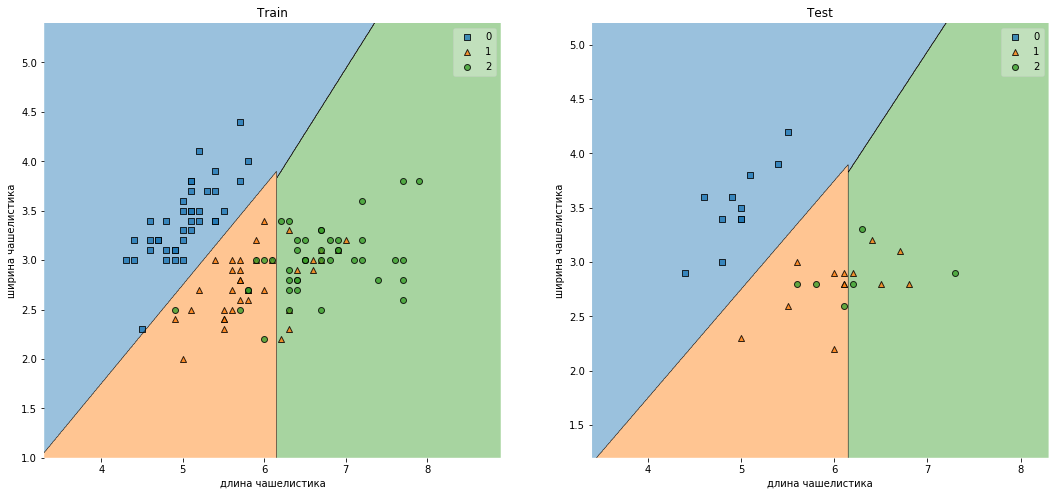

In [137]:
fig, gs = plt.figure(figsize=(18, 8)), GridSpec(1, 2)

for X, y, caption, i in ((X_train, y_train, "Train", 0), (X_test, y_test, "Test", 1)):
    splt = fig.add_subplot(gs[i])
    plot_decision_regions(X, y, clf, ax=splt)
    splt.set_xlabel(features[0])
    splt.set_ylabel(features[1])
    splt.title.set_text(caption)

plt.show()

In [138]:
clf.predict_proba(X_test[0:5])

array([[2.50517263e-02, 6.54328131e-01, 3.20620143e-01],
       [1.67469593e-03, 5.75825453e-01, 4.22499851e-01],
       [9.86749064e-01, 3.76644662e-03, 9.48448961e-03],
       [1.19166040e-04, 9.64179040e-02, 9.03462930e-01],
       [9.63922548e-01, 2.20796661e-02, 1.39977857e-02]])

Вычисление `predict_proba` — нетривиальная задача. Для этого `sklearn` делает калибровку на кросс-валидации. В данном случае калибруется каждый из бинарных классификаторов: к выходу применяется сигмоида 
$\frac{1}{1+e^{decision\_function(x)/T}}$ и подбирается температура (коэффициент в экспоненте) так, чтобы предсказанные значения были как можно ближе к вероятности на тестовом куске. Данный метод считается для каждого класса отдельно, так что он не сохраняет дискриминацию и может оказаться так, что результат предсказания (predict) и вероятность (predict_proba) не согласованы.

Так же в `sklearn` есть универсальная обертка для калибровки на кроссвалидации `CalibratedClassifierCV`.

In [139]:
from sklearn.calibration import CalibratedClassifierCV
clf = CalibratedClassifierCV(svm.SVC(kernel="linear", decision_function_shape='ovr'), method='sigmoid')
clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=SVC(C=1.0, break_ties=False,
                                          cache_size=200, class_weight=None,
                                          coef0=0.0,
                                          decision_function_shape='ovr',
                                          degree=3, gamma='scale',
                                          kernel='linear', max_iter=-1,
                                          probability=False, random_state=None,
                                          shrinking=True, tol=0.001,
                                          verbose=False),
                       cv=None, method='sigmoid')

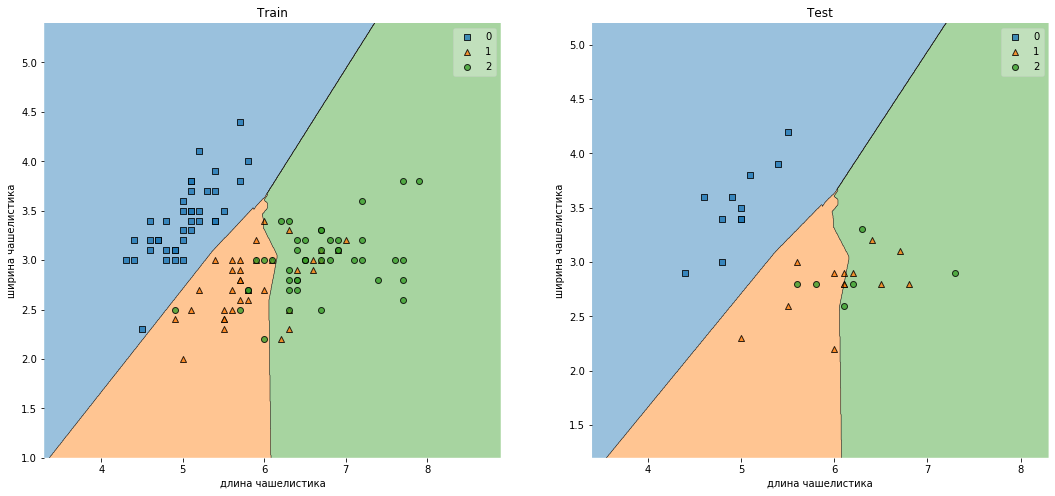

In [140]:
fig, gs = plt.figure(figsize=(18, 8)), GridSpec(1, 2)

for X, y, caption, i in ((X_train, y_train, "Train", 0), (X_test, y_test, "Test", 1)):
    splt = fig.add_subplot(gs[i])
    plot_decision_regions(X, y, clf, ax=splt)
    splt.set_xlabel(features[0])
    splt.set_ylabel(features[1])
    splt.title.set_text(caption)

plt.show()

In [141]:
clf.predict_proba(X_test[0:5])

array([[0.05170427, 0.64050323, 0.3077925 ],
       [0.04705726, 0.53647212, 0.41647062],
       [0.80777829, 0.06930006, 0.12292165],
       [0.04833877, 0.20872966, 0.74293157],
       [0.80049099, 0.13765263, 0.06185637]])

Обратите внимание, что `CalibratedClassifierCV` использует полученные им вероятности для предсказания, что может повлиять на дискриминацию.

Другой метод калибровки, реализованный в `sklearn` — изотоника. В этом случае на кроссвалидации подбирается не температура в сигмоиде, а произвольная изотоника (кусочно-линейная неубывающая функция), максимально хорошо приближающая вероятности на кроссвалидации. Изотоника позволяет лучше приблизить вероятности, но еще сильнее портит дискриминацию.

In [142]:
from sklearn.calibration import CalibratedClassifierCV
clf = CalibratedClassifierCV(svm.SVC(kernel="linear", decision_function_shape='ovr'), method='isotonic')
clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=SVC(C=1.0, break_ties=False,
                                          cache_size=200, class_weight=None,
                                          coef0=0.0,
                                          decision_function_shape='ovr',
                                          degree=3, gamma='scale',
                                          kernel='linear', max_iter=-1,
                                          probability=False, random_state=None,
                                          shrinking=True, tol=0.001,
                                          verbose=False),
                       cv=None, method='isotonic')

C:\Users\avalur\Anaconda3\lib\site-packages\sklearn\calibration.py:394: RuntimeWarning: invalid value encountered in true_divide
  proba /= np.sum(proba, axis=1)[:, np.newaxis]
C:\Users\avalur\Anaconda3\lib\site-packages\sklearn\calibration.py:394: RuntimeWarning: invalid value encountered in true_divide
  proba /= np.sum(proba, axis=1)[:, np.newaxis]
C:\Users\avalur\Anaconda3\lib\site-packages\sklearn\calibration.py:394: RuntimeWarning: invalid value encountered in true_divide
  proba /= np.sum(proba, axis=1)[:, np.newaxis]
C:\Users\avalur\Anaconda3\lib\site-packages\sklearn\calibration.py:394: RuntimeWarning: invalid value encountered in true_divide
  proba /= np.sum(proba, axis=1)[:, np.newaxis]


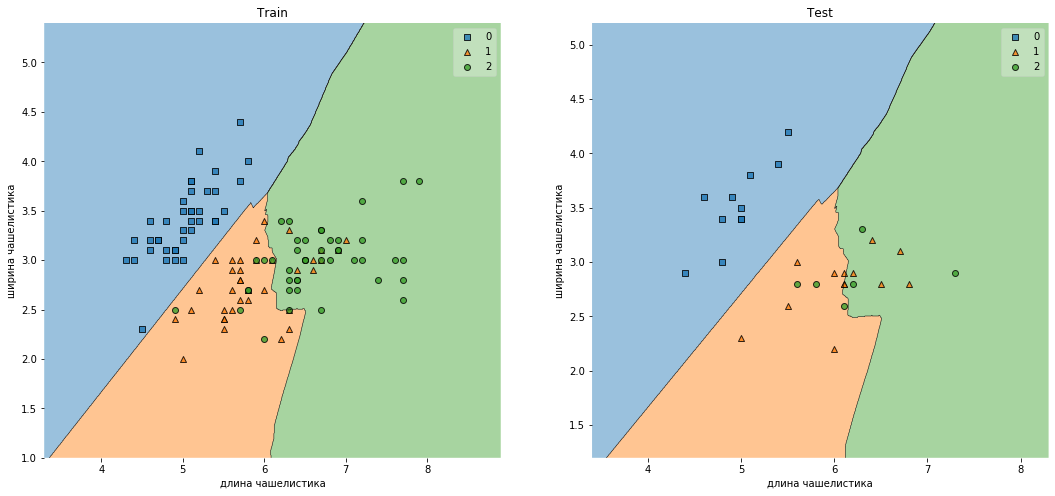

In [143]:
fig, gs = plt.figure(figsize=(18, 8)), GridSpec(1, 2)

for X, y, caption, i in ((X_train, y_train, "Train", 0), (X_test, y_test, "Test", 1)):
    splt = fig.add_subplot(gs[i])
    plot_decision_regions(X, y, clf, ax=splt)
    splt.set_xlabel(features[0])
    splt.set_ylabel(features[1])
    splt.title.set_text(caption)

plt.show()

Существуют методы для калибровки (например температура на softmax), не ломающие дискриминацию в многоклассовом случае, но в sklearn они не реализованы.

## Ядра

Кроме линейного ядра, мжно использовать rbf:

In [144]:
clf = svm.SVC(kernel='rbf', decision_function_shape='ovo') 
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

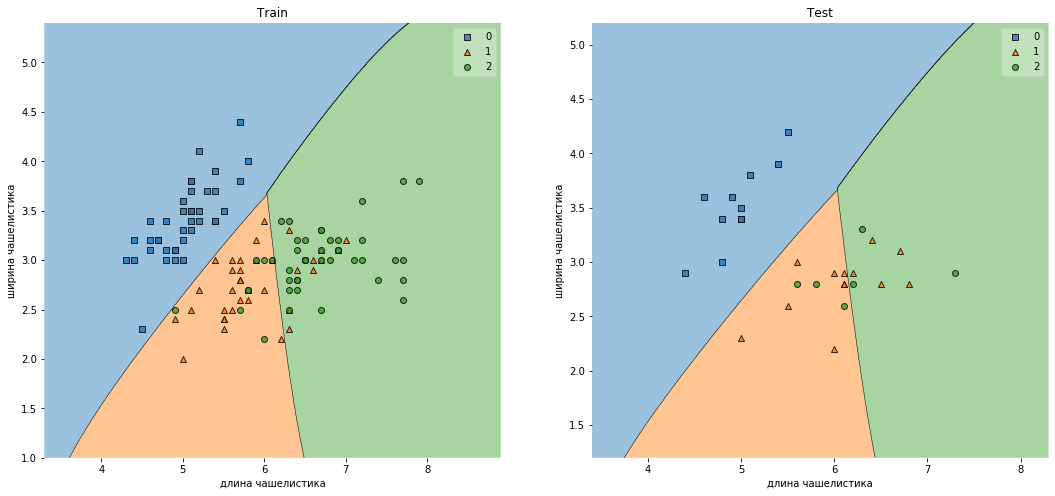

In [145]:
fig, gs = plt.figure(figsize=(18, 8)), GridSpec(1, 2)

for X, y, caption, i in ((X_train, y_train, "Train", 0), (X_test, y_test, "Test", 1)):
    splt = fig.add_subplot(gs[i])
    plot_decision_regions(X, y, clf, ax=splt)
    splt.set_xlabel(features[0])
    splt.set_ylabel(features[1])
    splt.title.set_text(caption)

plt.show()

polynom:

In [146]:
clf = svm.SVC(kernel='poly', degree=3, decision_function_shape='ovo') 
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

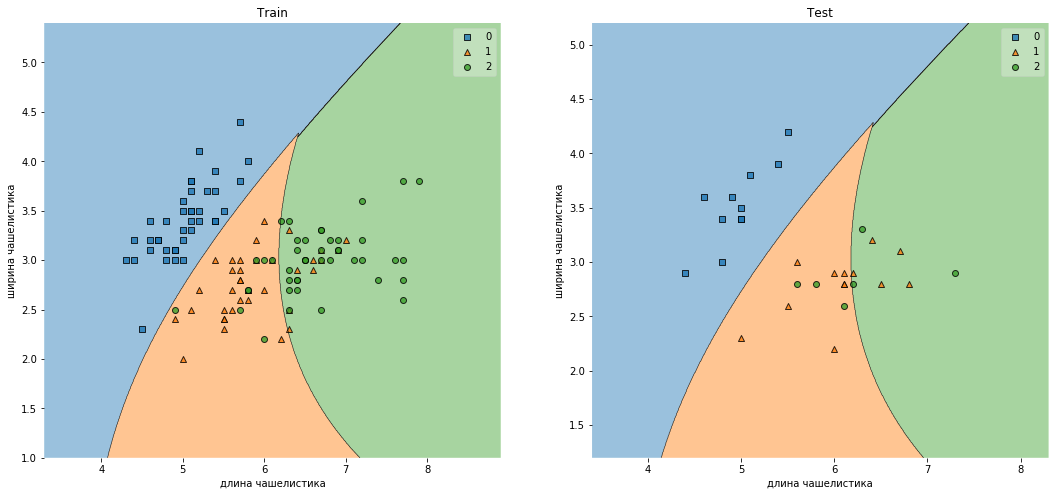

In [147]:
fig, gs = plt.figure(figsize=(18, 8)), GridSpec(1, 2)

for X, y, caption, i in ((X_train, y_train, "Train", 0), (X_test, y_test, "Test", 1)):
    splt = fig.add_subplot(gs[i])
    plot_decision_regions(X, y, clf, ax=splt)
    splt.set_xlabel(features[0])
    splt.set_ylabel(features[1])
    splt.title.set_text(caption)

plt.show()

произвольное ядро:

In [148]:
def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)

In [149]:
clf = svm.SVC(kernel=my_kernel, decision_function_shape='ovo') 
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale',
    kernel=<function my_kernel at 0x00000200663569D8>, max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

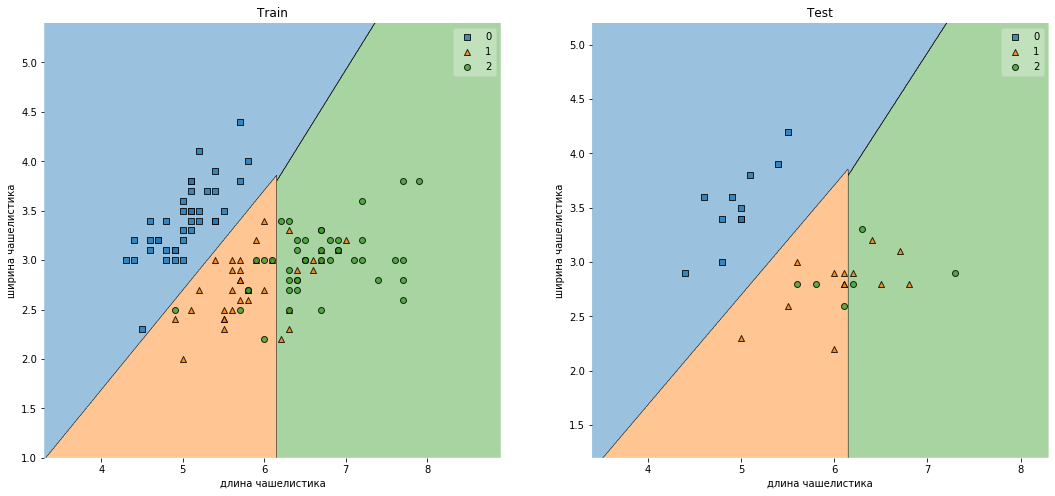

In [150]:
fig, gs = plt.figure(figsize=(18, 8)), GridSpec(1, 2)

for X, y, caption, i in ((X_train, y_train, "Train", 0), (X_test, y_test, "Test", 1)):
    splt = fig.add_subplot(gs[i])
    plot_decision_regions(X, y, clf, ax=splt)
    splt.set_xlabel(features[0])
    splt.set_ylabel(features[1])
    splt.title.set_text(caption)

plt.show()

Часто ядра могут быть значительно более сложными.
Пример, пакет `string-kernel` с ядрами для биоинформатиков.

In [151]:
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']

In [152]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train',
                                  categories=categories, shuffle=True, random_state=42)

In [153]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [154]:
len(twenty_train.data)

2257

In [155]:
import string
def process(s):
    return s.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation))).split()

In [156]:
', '.join(process(twenty_train.data[0]))

'From, sd345, city, ac, uk, Michael, Collier, Subject, Converting, images, to, HP, LaserJet, III, Nntp, Posting, Host, hampton, Organization, The, City, University, Lines, 14, Does, anyone, know, of, a, good, way, standard, PC, application, PD, utility, to, convert, tif, img, tga, files, into, LaserJet, III, format, We, would, also, like, to, do, the, same, converting, to, HPGL, HP, plotter, files, Please, email, any, response, Is, this, the, correct, group, Thanks, in, advance, Michael, Michael, Collier, Programmer, The, Computer, Unit, Email, M, P, Collier, uk, ac, city, The, City, University, Tel, 071, 477, 8000, x3769, London, Fax, 071, 477, 8565, EC1V, 0HB'

In [157]:
X_train = list(map(process, twenty_train.data))

In [158]:
y_train = twenty_train.target

SSK(2) ядро:

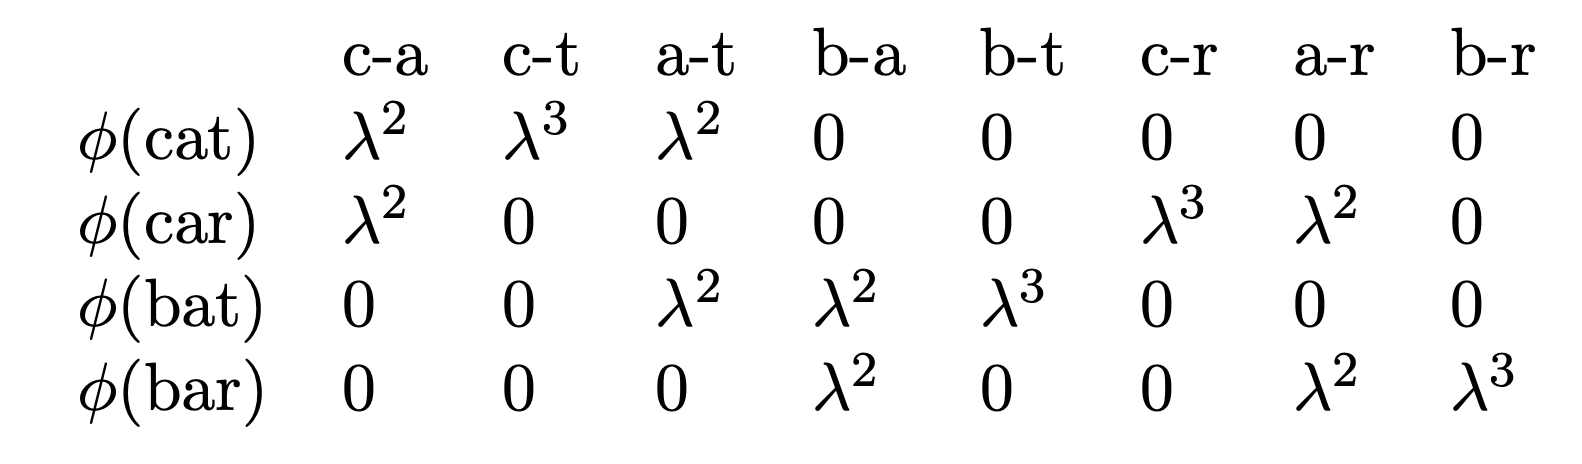

Считать в лоб — долго, но можно динамикой:

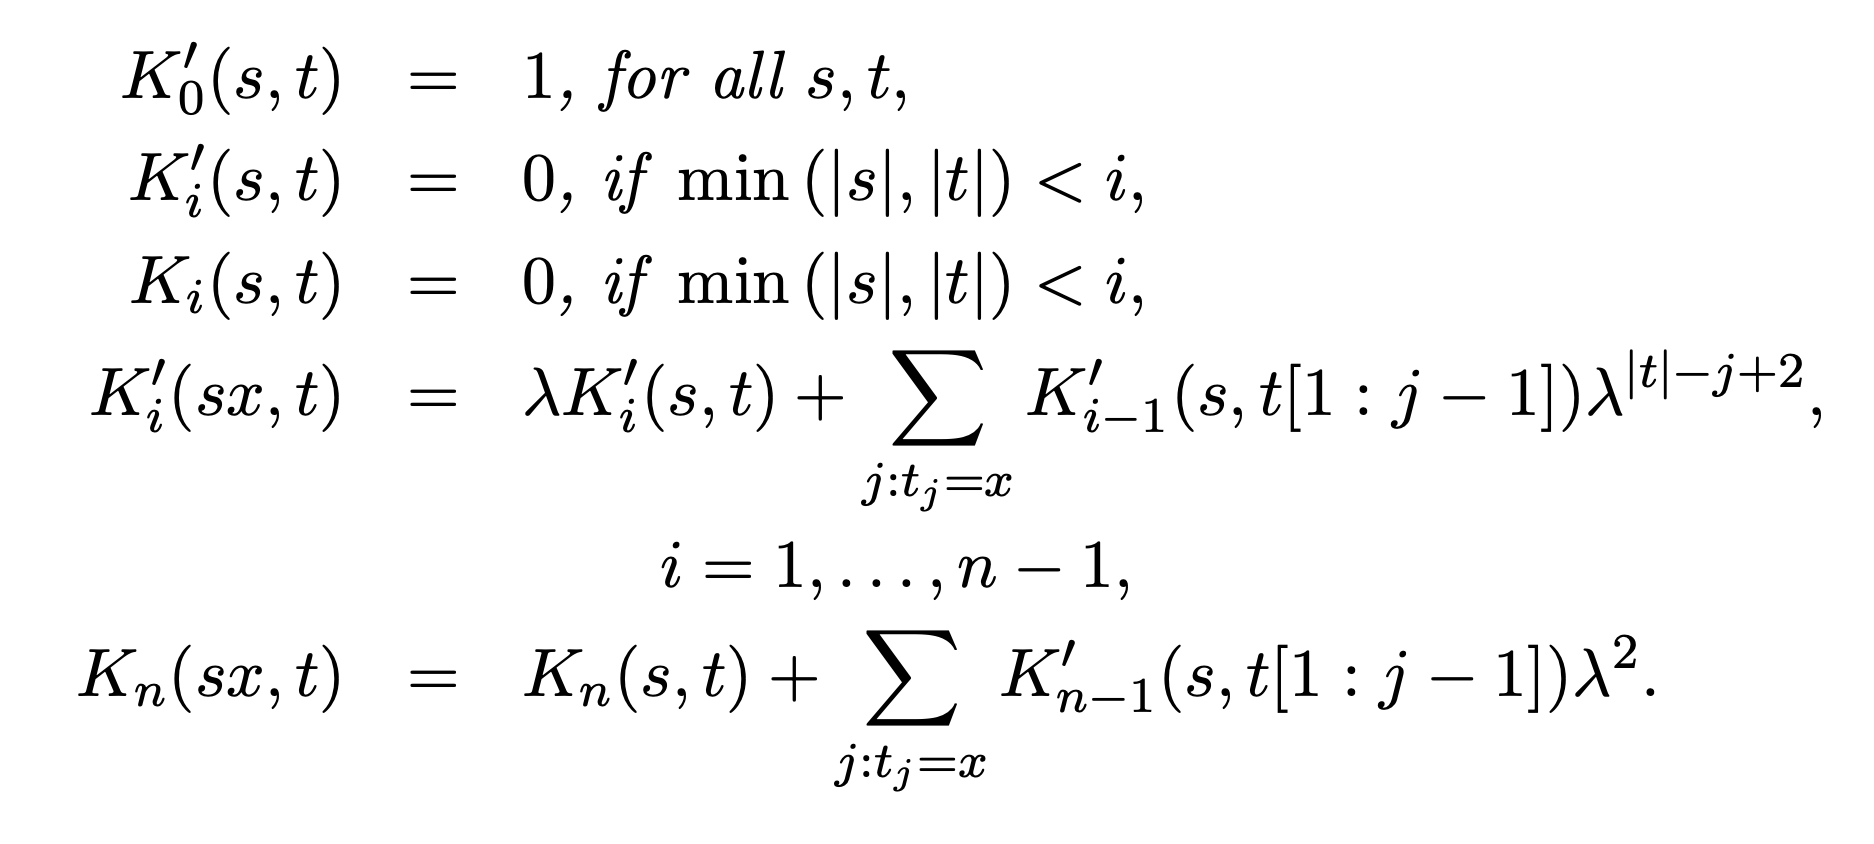

In [159]:
def ssk_array(s, t, n, lbda, accum=False):
    lens, lent = len(s), len(t)
    k_prim = np.zeros( (n, lens, lent), dtype=np.float )

    k_prim[0,:,:] = 1

    for i in range(1,n):
        for sj in range(i,lens):
            toret = 0
            for tk in range(i,lent):
                if s[sj-1]==t[tk-1]: 
                    toret = lbda * (toret + lbda*k_prim[i-1,sj-1,tk-1])
                else:
                    toret *= lbda
                k_prim[i,sj,tk] = toret + lbda * k_prim[i, sj-1, tk]

    k = 0
    start = 0 if accum else n-1

    for i in range(start, n):
        for sj in range(i,lens):
            for tk in range(i,lent):
                if s[sj]==t[tk]:
                    k += lbda*lbda*k_prim[i,sj,tk]

    return k

In [160]:
def kernel(n, lbda, accum=False):
    def func(s, t):
        return ssk_array(s, t, n, lbda, accum)
    return lambda s, t: func(s, t) / np.sqrt(func(s, s) * func(t,t))

In [161]:
import tqdm
def kernel_matrix(xs, ys, n, lbda, accum=False):
    kf = kernel(n, lbda, accum)
    ret = np.zeros((len(xs), len(ys)))
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            ret[i, j] = kf(x, y)
    return ret

In [162]:
train_kernel = kernel_matrix(X_train[0:20], X_train[0:20], 2, 0.1)

In [163]:
clf = svm.SVC(kernel='precomputed')
clf.fit(train_kernel, y_train[0:20])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [164]:
test_kernel = kernel_matrix(X_train[20:25], X_train[0:20], 2, 0.1)

In [165]:
clf.predict(test_kernel)

array([3, 3, 3, 3, 3], dtype=int64)